## Notebook to study effect of smoothing due to bigger cells

**Purpose**
Proving underestimation of cluster velocity due to bigger cell sizes causing smoothing. 

**Expection**
It will show the contribution from non-linear velocity directly.

High mass guys are always stuck (in the cosmic flow) and it is difficult to move them. Whereas the low mass guys are probably falling towards a supercluster or something. So low mass guys have more velocity amplitude. We estimate the velociy from the linear formula. So they are always underestimated and slope is less than 1.


Or if low mass clusters have more velocity amplitude, this means they have more residual nonlinear component. So the ratio of reconstructed velocity / true velocity will always be less than 1 because we reconstructed velocity from linear theory. Hence, the slope should always go towards less than one direction.

Lower mass guys with have large dispersion relative to high mass guys. 

**Implications**
If this is true, Tanimura's result should imporve 20%.

In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
from lmfit.models import GaussianModel
from scipy.optimize import curve_fit

In [2]:
dpi = 120

In [3]:
data_address = '../Data/'

#massive_clusters.csv contains clusters with M_500c greater 
#than 10^13.5 h^{-1} M_sun as done by Tanimura et al. (2020)

df_clusters_orig = pd.read_csv(data_address + 'massive_clusters.csv', 
                          usecols = ['x[kpc/h]', 'y[kpc/h]', 'z[kpc/h]', 
                                     'm500c[Msol/h]', 'vx[km/s]', 'vy[km/s]', 
                                     'vz[km/s]' ])  

df_clusters_orig.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,6080.000000,6080.000000,6080.000000,6.080000e+03,6080.000000,6080.000000,6080.000000
mean,326416.401838,322055.402286,321308.240244,6.356245e+13,2.109102,-1.647297,-4.296055
std,186021.550694,182650.899538,183665.854310,4.851698e+13,316.064539,306.226537,286.454388
min,19.163288,152.653880,87.370949,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,160978.575000,164793.430000,161863.925000,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,338884.565000,333274.345000,322110.075000,4.801630e+13,-3.619450,1.969450,-8.055475
75%,486227.747500,473556.765000,478893.610000,6.945502e+13,206.816750,207.755750,181.532000
max,639887.560000,639933.380000,639848.380000,7.438200e+14,1197.640000,1164.960000,1201.260000


In [4]:
%%time

df_clusters_orig['r_mag[kpc/h]'] = np.sqrt(df_clusters_orig['x[kpc/h]']**2 +
                                     df_clusters_orig['y[kpc/h]']**2 +
                                     df_clusters_orig['z[kpc/h]']**2)
        
        
df_clusters_orig['v_los[km/s]'] = (((df_clusters_orig['vx[km/s]'] * df_clusters_orig['x[kpc/h]']) +
                              (df_clusters_orig['vy[km/s]'] * df_clusters_orig['y[kpc/h]']) +
                              (df_clusters_orig['vz[km/s]'] * df_clusters_orig['z[kpc/h]'])) /
                               df_clusters_orig['r_mag[kpc/h]'])
print(datetime.now())
df_clusters_orig.describe()

2021-07-28 09:44:37.380195
CPU times: user 36.1 ms, sys: 2.54 ms, total: 38.7 ms
Wall time: 97.1 ms


,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s],r_mag[kpc/h],v_los[km/s]
count,6080.000000,6080.000000,6080.000000,6.080000e+03,6080.000000,6080.000000,6080.000000,6.080000e+03,6080.000000
mean,326416.401838,322055.402286,321308.240244,6.356245e+13,2.109102,-1.647297,-4.296055,6.204963e+05,-8.525332
std,186021.550694,182650.899538,183665.854310,4.851698e+13,316.064539,306.226537,286.454388,1.737164e+05,299.184143
min,19.163288,152.653880,87.370949,3.162340e+13,-1179.530000,-1163.520000,-1104.790000,6.372897e+04,-1143.826025
25%,160978.575000,164793.430000,161863.925000,3.795035e+13,-200.229000,-205.139250,-190.806000,5.063756e+05,-203.207277
50%,338884.565000,333274.345000,322110.075000,4.801630e+13,-3.619450,1.969450,-8.055475,6.340333e+05,-8.806440
75%,486227.747500,473556.765000,478893.610000,6.945502e+13,206.816750,207.755750,181.532000,7.480982e+05,189.343277
max,639887.560000,639933.380000,639848.380000,7.438200e+14,1197.640000,1164.960000,1201.260000,1.042882e+06,1032.204670


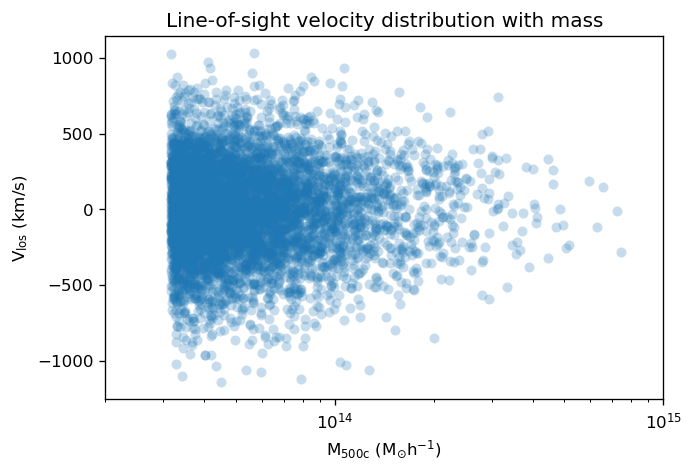

In [5]:
plt.figure(dpi = dpi)
plt.scatter(df_clusters_orig['m500c[Msol/h]'], df_clusters_orig['v_los[km/s]'],
            alpha = 0.25, linewidth = 0)
plt.xscale('log')
plt.xlim(2e13, 1e15)
plt.xlabel('M$_{500\mathrm{c}}$' + ' (M$_{\odot}$' + 'h$^{-1}$)')
plt.ylabel('V$_{\mathrm{los}}$ (km/s)')
plt.title('Line-of-sight velocity distribution with mass');


In [6]:
def lmfit_gaussian_fit_func(x_values, y_values):
    
    gaussian_model = GaussianModel()
    
    fit_params = gaussian_model.guess(y_values, x = x_values)
    
    result = gaussian_model.fit(y_values, 
                                params = fit_params,
                                x = x_values)
    
    result.plot_fit(data_kws = {'ms': 0}, fit_kws = {'color': 'r'})
    
    return result

# mass_bin_linmix_145['beta']
# mass_bin_linmix_145['alpha']

In [7]:
def plot_fit_gaussian(data, title, x_label):
    plt.figure(dpi = dpi * 0.7)

    hist_output = plt.hist(data, bins = 100, label = 'histogram');

    x_val = hist_output[1][:-1] + (hist_output[1][1] - hist_output[1][0])
    y_val = hist_output[0]

    fit = lmfit_gaussian_fit_func(x_val, y_val)

    plt.xlabel(x_label)
    plt.ylabel('Count')
    plt.title(f'Bin center: {title}')

    x_pos_text = 0.05
    plt.text(x_pos_text, 0.8, 
                 f"$\mu$ = {round(fit.params['center'].value, 2)}", 
                 transform=plt.gca().transAxes)
    plt.text(x_pos_text, 0.75, 
                 f"$\sigma$ = {round(fit.params['sigma'].value, 2)}", 
                 transform=plt.gca().transAxes);
    
    return fit

In [57]:
def scipy_curve_fit_func(x_values, y_values, y_errors = None):
    
    def linear_func(x, m, c):
        return m*x + c
    
    if y_errors is None:
        param = curve_fit(linear_func, x_values, y_values)
    
    else:
        param = curve_fit(linear_func, x_values, y_values, sigma = y_errors, 
              absolute_sigma = True)
    
    return param

In [8]:
def clus_binner(min_mass, max_mass):
    
    df_clus_bin = df_clusters_orig[(df_clusters_orig['m500c[Msol/h]'] > min_mass) &
                                     (df_clusters_orig['m500c[Msol/h]'] < max_mass)]
    
    return df_clus_bin

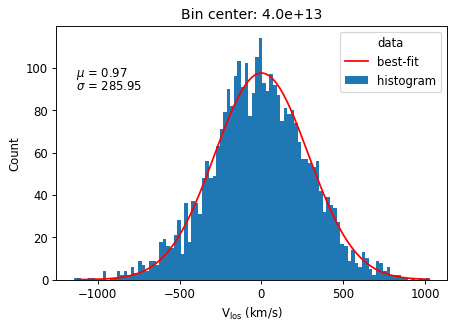

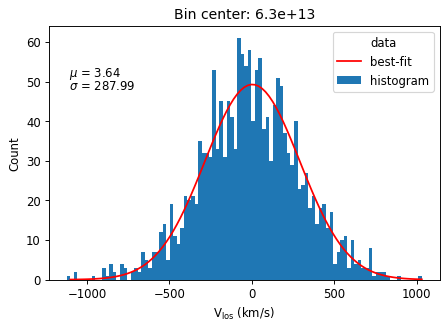

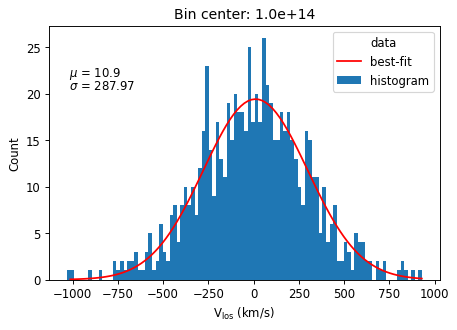

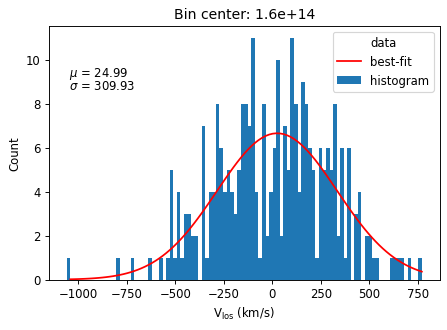

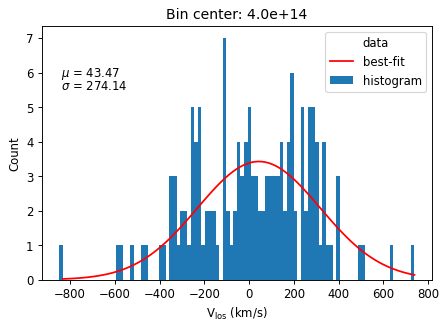

In [17]:
clus_mass_bins_log = np.arange(13.50, 14.31, 0.2)
clus_mass_bins_log = np.append(clus_mass_bins_log, 14.9)
clus_mass_bins_linear = 10**clus_mass_bins_log

bins_centers_log = np.arange(13.6, 14.21, 0.2)
bins_centers_log = np.append(bins_centers_log, 14.6)

bins_centers_linear = 10**bins_centers_log
bins_centers_linear_str = ['{:.1e}'.format(i) for i in bins_centers_linear]

df_vlos_summary = pd.DataFrame(columns= ['Bin Center', 'Clusters', 'Gaussian Center',
                           'Gaussian Sigma', 'Mean', 'Median', '16th Quantile', 
                           '84th Quantile'])


for i, clus_min_mass in enumerate(clus_mass_bins_linear[:-1]):
    
    clus_max_mass = clus_mass_bins_linear[i+1]
    df_clus_bin = clus_binner(clus_min_mass, clus_max_mass)
       
    fit = plot_fit_gaussian(df_clus_bin['v_los[km/s]'], 
                            bins_centers_linear_str[i],
                            x_label = 'V$_{\mathrm{los}}$ (km/s)')
    
    center = fit.params['center'].value
    sigma = fit.params['sigma'].value
    
    quantile_16th = np.quantile(df_clus_bin['v_los[km/s]'], q = 0.16)
    quantile_84th = np.quantile(df_clus_bin['v_los[km/s]'], q = 0.84)
    
    median = np.median(df_clus_bin['v_los[km/s]'])
    mean = np.median(df_clus_bin['v_los[km/s]'])
    
    df_vlos_summary = df_vlos_summary.append({'Bin Center': bins_centers_linear[i],
                                              'Clusters': len(df_clus_bin),
                                              'Gaussian Center': center,
                                              'Gaussian Sigma': sigma,
                                              'Mean': mean,
                                              'Median': median,
                                              '16th Quantile': quantile_16th, 
                                              '84th Quantile': quantile_84th,
                                             }, 
                                               ignore_index=True)
    
#     plt.close()


In [10]:
df_vlos_summary

,Bin Center,Clusters,Gaussian Center,Gaussian Sigma,Mean,Median,16th Quantile,84th Quantile
0,3.981072e+13,3261.0,0.973741,285.947524,-12.220350,-12.220350,-294.754932,282.745209
1,6.309573e+13,1674.0,3.640361,287.985997,-11.692187,-11.692187,-294.126446,281.190718
2,1.000000e+14,723.0,10.904388,287.972411,1.327614,1.327614,-284.818952,293.640925
3,1.584893e+14,277.0,24.986583,309.930180,22.470581,22.470581,-285.581964,299.221877
4,3.981072e+14,145.0,43.473260,274.140400,19.085364,19.085364,-249.952018,278.056810


Using Gaussian center and sigma: 


Slope:  45.01  +-  364.694
Intercept:  -615.06  +-  5124.108


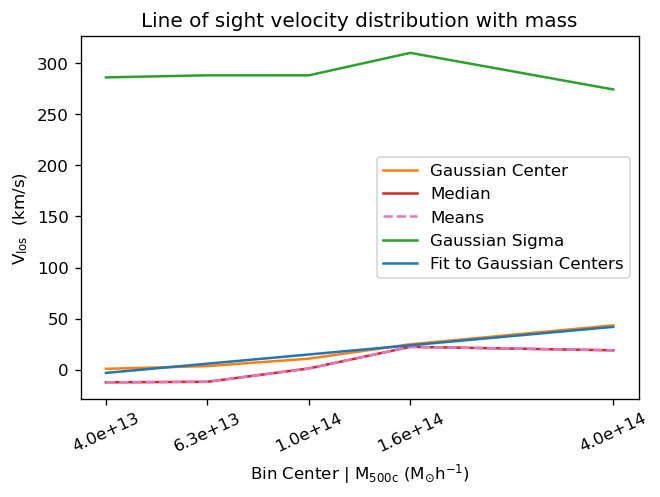

In [67]:
plt.figure(dpi = dpi)
# plt.scatter(df_clusters_orig['m500c[Msol/h]'], df_clusters_orig['v_mag[km/s]'],
#             alpha = 0.25, linewidth = 0)
# plt.errorbar(bins_centers_linear, df_vlos_summary['Gaussian Center'], 
#              yerr = df_vlos_summary['Gaussian Sigma'], c = 'C1', 
#              label = 'Gaussian Center', capsize = 1, elinewidth = 0.2,
#              capthick = 0.2)
plt.plot(bins_centers_linear, df_vlos_summary['Gaussian Center'], 
             c = 'C1', 
             label = 'Gaussian Center')
plt.plot(bins_centers_linear, df_vlos_summary['Median'], c = 'C3', label = 'Median')
plt.plot(bins_centers_linear, df_vlos_summary['Mean'], c = 'C6', label = 'Means', ls = 'dashed')
# plt.plot(bins_centers_linear, df_vlos_summary['16th Quantile'], c = 'C4', label = '16th Quantile')
# plt.plot(bins_centers_linear, df_vlos_summary['84th Quantile'], c = 'C5', label = '84th Quantile')
plt.plot(bins_centers_linear, df_vlos_summary['Gaussian Sigma'], c = 'C2', label = 'Gaussian Sigma')


fit_to_centers_los = scipy_curve_fit_func(bins_centers_log, 
                             df_vlos_summary['Gaussian Center'], 
                             df_vlos_summary['Gaussian Sigma'])

slope_los, intercept_los = fit_to_centers_los[0]
slope_err_los, intercept_err_los = (np.sqrt(fit_to_centers_los[1][0,0]), 
                                   np.sqrt(fit_to_centers_los[1][1,1]))

def linear_func(x, m, c):
        return m*x + c

plt.plot(bins_centers_linear, 
         linear_func(bins_centers_log, slope_los, intercept_los),
         label = 'Fit to Gaussian Centers')

print('Using Gaussian center and sigma: ')
print('\n')

print('Slope: ', round(slope_los, 2), ' +- ', round(slope_err_los, 3))
print('Intercept: ', round(intercept_los, 2), ' +- ', round(intercept_err_los, 3))

plt.legend()
plt.xscale('log')
# plt.xlim(2e13, 1e15)
plt.xlabel('Bin Center | M$_{500\mathrm{c}}$' + ' (M$_{\odot}$' + 'h$^{-1}$)')
plt.ylabel('V$_{\mathrm{los}}$  (km/s)')
plt.title('Line of sight velocity distribution with mass');

plt.xticks(bins_centers_linear, bins_centers_linear_str, 
                      rotation = 25);
plt.minorticks_off()

**27 July, 2021**  
Very flat (small) trend. To really demonstrate this trend from simulation, one probably need many more simulation volume in sample and extend the mass range. One really has to go tofull cosmological simulations so that you have bunch of guys with 4 x 10^14 mass. 1000s. Either big patch from the CETA. But we are going there.

Only one order (decade) of masses is also not sufficient to find the mass trend. **Task** Check the low mass range of WHL clusters. But let's now go there.

**Task** Look into Emilio's thesis for the analytic demonstration of how smoothing affects velocity reconstruction. We need to have an analytic understanding of why this mass trend should be there.

In [12]:
df_clusters_orig['v_mag[km/s]'] = np.sqrt(df_clusters_orig['vx[km/s]']**2 +  
                                          df_clusters_orig['vy[km/s]']**2 +
                                          df_clusters_orig['vz[km/s]']**2)  
df_clusters_orig.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s],r_mag[kpc/h],v_los[km/s],v_mag[km/s]
count,6080.000000,6080.000000,6080.000000,6.080000e+03,6080.000000,6080.000000,6080.000000,6.080000e+03,6080.000000,6080.000000
mean,326416.401838,322055.402286,321308.240244,6.356245e+13,2.109102,-1.647297,-4.296055,6.204963e+05,-8.525332,479.401096
std,186021.550694,182650.899538,183665.854310,4.851698e+13,316.064539,306.226537,286.454388,1.737164e+05,299.184143,214.219527
min,19.163288,152.653880,87.370949,3.162340e+13,-1179.530000,-1163.520000,-1104.790000,6.372897e+04,-1143.826025,13.103430
25%,160978.575000,164793.430000,161863.925000,3.795035e+13,-200.229000,-205.139250,-190.806000,5.063756e+05,-203.207277,324.017029
50%,338884.565000,333274.345000,322110.075000,4.801630e+13,-3.619450,1.969450,-8.055475,6.340333e+05,-8.806440,454.917210
75%,486227.747500,473556.765000,478893.610000,6.945502e+13,206.816750,207.755750,181.532000,7.480982e+05,189.343277,610.166466
max,639887.560000,639933.380000,639848.380000,7.438200e+14,1197.640000,1164.960000,1201.260000,1.042882e+06,1032.204670,1566.321109


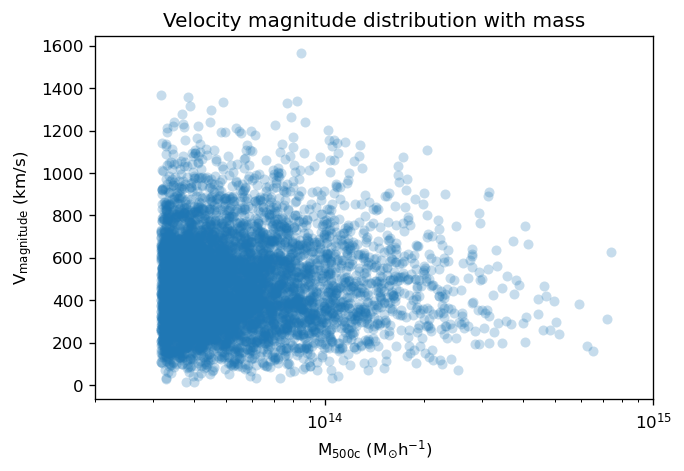

In [13]:
plt.figure(dpi = dpi)
plt.scatter(df_clusters_orig['m500c[Msol/h]'], df_clusters_orig['v_mag[km/s]'],
            alpha = 0.25, linewidth = 0)
plt.xscale('log')
plt.xlim(2e13, 1e15)
plt.xlabel('M$_{500\mathrm{c}}$' + ' (M$_{\odot}$' + 'h$^{-1}$)')
plt.ylabel('V$_{\mathrm{magnitude}}$ (km/s)')
plt.title('Velocity magnitude distribution with mass');

**14 July 2021**  
A: It seems there is a weak mass (trend).

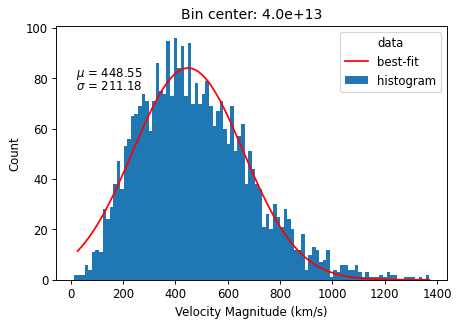

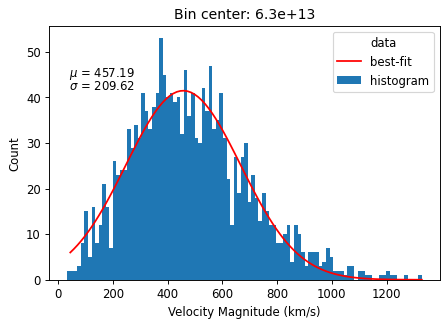

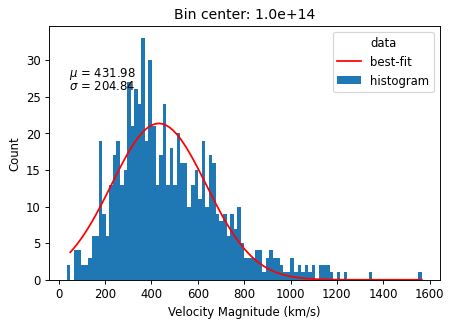

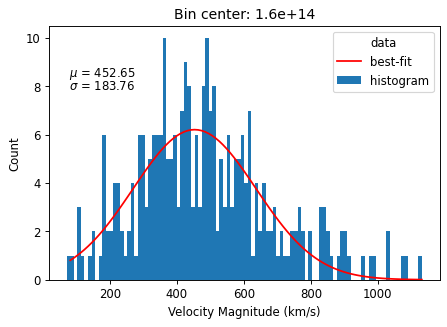

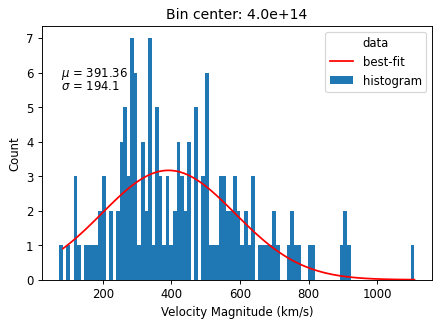

In [22]:
clus_mass_bins_log = np.arange(13.50, 14.31, 0.2)
clus_mass_bins_log = np.append(clus_mass_bins_log, 14.9)
clus_mass_bins_linear = 10**clus_mass_bins_log

bins_centers_log = np.arange(13.6, 14.21, 0.2)
bins_centers_log = np.append(bins_centers_log, 14.6)

bins_centers_linear = 10**bins_centers_log
bins_centers_linear_str = ['{:.1e}'.format(i) for i in bins_centers_linear]

centers = np.zeros(bins_centers_log.size)
sigmas = np.zeros(bins_centers_log.size)

quantile_16th = np.zeros(bins_centers_log.size)
quantile_84th = np.zeros(bins_centers_log.size)

medians = np.zeros(bins_centers_log.size)
means = np.zeros(bins_centers_log.size)

for i, clus_min_mass in enumerate(clus_mass_bins_linear[:-1]):
    
    clus_max_mass = clus_mass_bins_linear[i+1]
    df_clus_bin = clus_binner(clus_min_mass, clus_max_mass)
       
    fit = plot_fit_gaussian(df_clus_bin['v_mag[km/s]'], 
                            bins_centers_linear_str[i],
                            x_label = 'Velocity Magnitude (km/s)')
    
    centers[i] = fit.params['center'].value
    sigmas[i] = fit.params['sigma'].value
    
    quantile_16th[i] = np.quantile(df_clus_bin['v_mag[km/s]'], q = 0.16)
    quantile_84th[i] = np.quantile(df_clus_bin['v_mag[km/s]'], q = 0.84)
    
    medians[i] = np.median(df_clus_bin['v_mag[km/s]'])
    means[i] = np.median(df_clus_bin['v_mag[km/s]'])
    
#     plt.close()


**27 July, 2021**  
**Task** Probably a T distibution (A), Maxvellian (B) or lognormal (C) would be a better fit.  
A: T distribution is probably of squareroot of sum of squares of Gussian random variables (vel components).    

A: There's scarcity of data at high mass end. Hydro simulation like Magneticum not really needed. Bigger simulation would be better but not now.  
B: TNG 300 (can be used).

In [15]:
df_summary = pd.DataFrame({'Bin Center': bins_centers_linear,
                           'Gaussian Center': centers,
                           'Gaussian Sigma': sigmas,
                           'Mean': means,
                           'Median': medians,
                           '16th Quantile': quantile_16th, 
                           '84th Quantile': quantile_84th, })
df_summary

,Bin Center,Gaussian Center,Gaussian Sigma,Mean,Median,16th Quantile,84th Quantile
0,3.981072e+13,448.552993,211.183857,454.014378,454.014378,262.489606,684.592374
1,6.309573e+13,457.190664,209.622393,464.236888,464.236888,271.861220,691.860244
2,1.000000e+14,431.978205,204.841761,438.569334,438.569334,271.563694,687.842527
3,1.584893e+14,452.649109,183.757177,466.672048,466.672048,293.687075,674.576510
4,3.981072e+14,391.364063,194.099928,405.742176,405.742176,261.510613,620.594728


Using Gaussian center and sigma: 


Slope:  -55.82  +-  260.964
Intercept:  1221.05  +-  3671.952


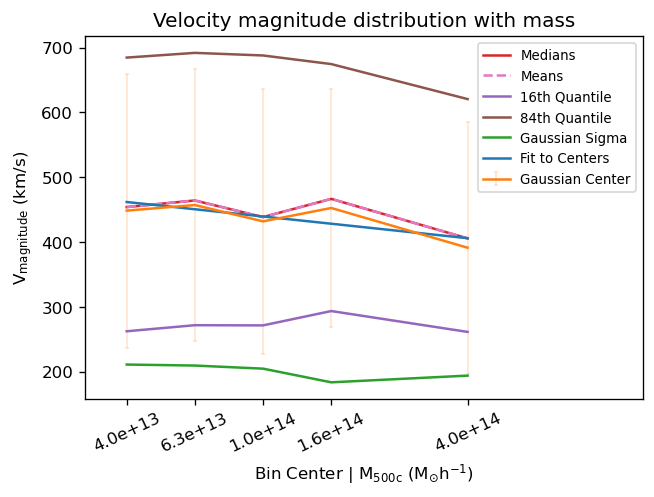

In [65]:
plt.figure(dpi = dpi)
# plt.scatter(df_clusters_orig['m500c[Msol/h]'], df_clusters_orig['v_mag[km/s]'],
#             alpha = 0.25, linewidth = 0)
plt.errorbar(bins_centers_linear, centers, yerr = sigmas, c = 'C1', 
             label = 'Gaussian Center', capsize = 1, elinewidth = 0.2,
             capthick = 0.2)
# plt.plot(bins_centers_linear, centers, c = 'C1', 
#              label = 'Gaussian Center')
plt.plot(bins_centers_linear, medians, c = 'C3', label = 'Medians')
plt.plot(bins_centers_linear, means, c = 'C6', label = 'Means', ls = 'dashed')
plt.plot(bins_centers_linear, quantile_16th, c = 'C4', label = '16th Quantile')
plt.plot(bins_centers_linear, quantile_84th, c = 'C5', label = '84th Quantile')
plt.plot(bins_centers_linear, sigmas, c = 'C2', label = 'Gaussian Sigma')


fit_to_centers_amplitude = scipy_curve_fit_func(bins_centers_log, 
                             centers, sigmas)

slope_amplitude, intercept_amplitude = fit_to_centers_amplitude[0]
slope_err_amplitude, intercept_err_amplitude = (np.sqrt(fit_to_centers_amplitude[1][0,0]), 
                                   np.sqrt(fit_to_centers_amplitude[1][1,1]))

def linear_func(x, m, c):
        return m*x + c

plt.plot(bins_centers_linear, 
         linear_func(bins_centers_log, slope_amplitude, intercept_amplitude),
         label = 'Fit to Centers')

print('Using Gaussian center and sigma: ')
print('\n')

print('Slope: ', round(slope_amplitude, 2), ' +- ', round(slope_err_amplitude, 3))
print('Intercept: ', round(intercept_amplitude, 2), ' +- ', round(intercept_err_amplitude, 3))

plt.legend(frameon = True, loc = 'upper right', fontsize = 8)
plt.xscale('log')
plt.xlim(3e13, 13e14)
plt.xlabel('Bin Center | M$_{500\mathrm{c}}$' + ' (M$_{\odot}$' + 'h$^{-1}$)')
plt.ylabel('V$_{\mathrm{magnitude}}$ (km/s)')
plt.title('Velocity magnitude distribution with mass');

plt.xticks(bins_centers_linear, bins_centers_linear_str, rotation = 25);
plt.minorticks_off()

**27 July, 2021**  
A: There's less velocity at high mass end (probably because they are stuck with cosmic flow and have less random motion.) So the ratio of reconstructed velocity / true velocity (as in slope - mass plot) should be high. So maybe the trend is okay but it seems very insignificant. 

The linear theory reconstructed velocity, if there is no smoothing effect, should the same but you're dividing by a number that gets smaller at high mass end. Hence the ratio when this number is in denominator will become large.

Sigma itself does not show much mass trend. It looks like when you look at a scatterplot they're just way too many points near the low mass regime and give the impression there is more scatter at the low mass end. They must be having outliers. And high mass, you have too few points if there are no (not many) outlier. Actual sigma probably (is) very similar. 

We can always say we prefer to use 10 Mega parsec cell because of the low Poisson error despite the fact that this cell creates the overall bais. But we correct for bais. And also this cell size clearly demonstrates a mass trend. We correct for the mass trend.

It will be nice to understand and maybe we can ask Cristiano if he has some idea what does a bigger smoothing to density field really do? I mean how the effect of smoothing goes into this?

There is an additional this Kaiser effect term in this ACT paper. We don't know how important this term is. Anyway we don't know how ACT guys solve their differentiational equation for the velocity.